In [14]:
import pandas as pd

df = pd.read_csv("../data/TSLA.csv", parse_dates=["Date"])
df.dropna(inplace=True)
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)
df


,Date,Close,High,Low,Open,Volume
0,2015-01-02,14.620667457580566,14.883333206176758,14.21733283996582,14.857999801635742,71466000
1,2015-01-05,14.005999565124512,14.433333396911621,13.810667037963867,14.303333282470703,80527500
2,2015-01-06,14.085332870483398,14.279999732971191,13.61400032043457,14.003999710083008,93928500
3,2015-01-07,14.063332557678223,14.3186674118042,13.985333442687988,14.223333358764648,44526000
4,2015-01-08,14.041333198547363,14.25333309173584,14.000666618347168,14.187333106994629,51637500
...,...,...,...,...,...,...
2510,2024-12-23,430.6000061035156,434.510009765625,415.4100036621094,431.0,72698100
2511,2024-12-24,462.2799987792969,462.7799987792969,435.1400146484375,435.8999938964844,59551800
2512,2024-12-26,454.1300048828125,465.3299865722656,451.0199890136719,465.1600036621094,76366400
2513,2024-12-27,431.6600036621094,450.0,426.5,449.5199890136719,82666800


Preprocessing the data

In [15]:
# 1. Strip whitespace from column names
df.columns = df.columns.str.strip()

# 2. Convert Date column to datetime
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 3. Convert all other columns to numeric (safely)
for col in df.columns:
    if col != "Date":
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 4. Drop rows where Date or Close is missing
df.dropna(subset=["Date", "Close"], inplace=True)

# 5. Sort and reset index
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop_duplicates(inplace=True)
df

,Date,Close,High,Low,Open,Volume
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...
2510,2024-12-23,430.600006,434.510010,415.410004,431.000000,72698100
2511,2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
2512,2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
2513,2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800


Plot Closing price vs Date

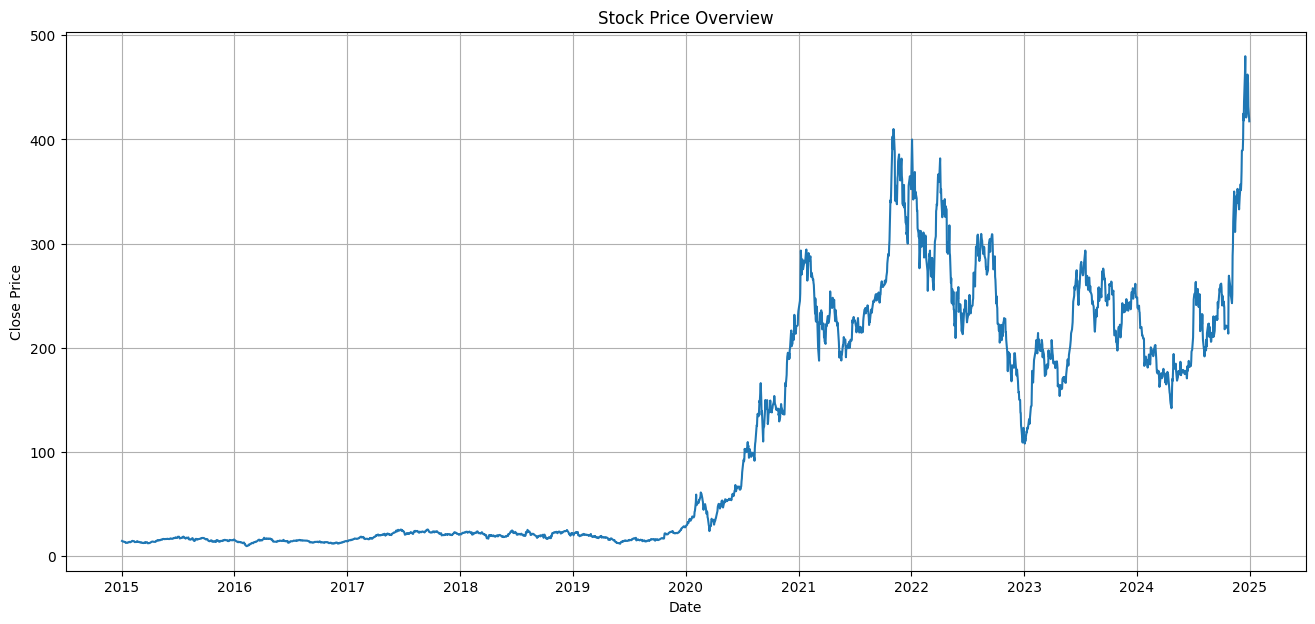

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))
plt.plot(df["Date"], df["Close"])
plt.title("Stock Price Overview")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()